In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
from nltk.corpus import stopwords
nltk.download('stopwords')
from CleanData import clean_comment, get_bag_of_words
import datetime

pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to /home/zchao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [2]:
# Load all article reviews:
media_bias = pd.read_csv('../data/MediaBiasChart.csv')
media_bias = media_bias.groupby('Source').mean()
media_bias.reset_index(level=0, inplace=True)
media_bias

,Source,Bias,Quality
0,ABC,-1.846000,49.866500
1,AP,-1.063261,52.189130
2,Al Jazeera,-3.705333,46.700000
3,Alternet,-19.156250,26.385000
4,"American Spectator, The",21.767778,23.481111
5,Axios,-5.737857,47.303571
6,BBC,-3.033333,46.266667
7,Bipartisan Report,-23.550667,21.928667
8,Bloomberg,-0.850345,47.522759
9,Breitbart,18.987857,30.637143


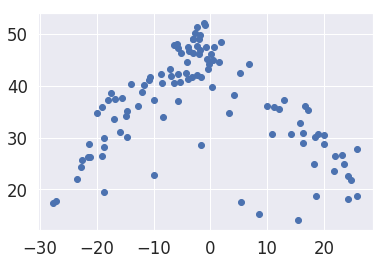

In [3]:
plt.scatter(media_bias['Bias'].to_numpy(),media_bias['Quality'].to_numpy())

In [4]:
# A hand-make dictionary mapping each media in MediaBiasChart_to_Tweet to their twitter account name
# The full list of media twitter account is from news_outlet_tweet_IDs
# at https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/2FIFLH

MediaBiasChart_to_Tweet = {'ABC':'ABC','AP':'AP','Axios':'axios','CNN':'CNN','Wall Street Journal':'WSJ',\
    'The Atlantic':'TheAtlantic','The Hill':'thehill', 'BBC':'BBC', 'Think Progress':'thinkprogress',\
    'MSNBC':'MSNBC','The Nation':'thenation','Daily Beast':'thedailybeast','Mother Jones':'MotherJones',\
    'CNSNews':'cnsnews','Fox News':'FoxNews', 'The Federalist':'FDRLST','Breitbart':'BreitbartNews',\
    'Daily Caller':'DailyCaller','The Blaze':'theblaze','Business Insider':'businessinsider',\
    'CBS':'CBSNews','The Economist':'TheEconomist','BuzzFeed':'BuzzFeed','Daily Signal':'DailySignal',\
    'New Republic':'newrepublic','Foreign Policy':'ForeignPolicy','IJR':'TheIJR','National Review':'NRO',\
    'National Public Radio':'NPR','New York Post':'nypost','New York Times':'nytimes','The New Yorker':'NewYorker',\
    'NewsMax':'newsmax','One America News Network':'OANN','Politico':'politico','Quartz':'qz',\
    'Reason':'reason','Reuters':'Reuters','Slate':'Slate','Talking Points Memo':'TPM','Vanity Fair':'VanityFair',\
    'Vox':'voxdotcom','Washington Examiner':'dcexaminer','Washington Free Beacon':'FreeBeacon',\
    'Washington Post':'washingtonpost','Washington Times':'WashTimes','The Week':'TheWeek','Bloomberg':'Bloomberg',\
    'Christian Science Monitor':'csmonitor', 'Democracy Now':'democracynow','Financial Times':'FT',\
    'Fiscal Times':'TheFiscalTimes','Forbes':'Forbes','Fortune':'FortuneMagazine','Forward':'jdforward',\
    'FreeSpeech TV':'freespeechtv','Huffington Post':'HuffPost','LA Times':'latimes','Marketwatch':'MarketWatch',\
    'OZY':'ozy','PBS':'PBS','ProPublica':'ProPublica','Time':'TIME','USA Today':'USATODAY',\
    'Weather.com':'weatherchannel'}

media_bias.Source.map(MediaBiasChart_to_Tweet)

0      ABC            
1      AP             
2      NaN            
3      NaN            
4      NaN            
5      axios          
6      BBC            
7      NaN            
8      Bloomberg      
9      BreitbartNews  
10     businessinsider
11     BuzzFeed       
12     CBSNews        
13     CNN            
14     cnsnews        
15     csmonitor      
16     NaN            
17     NaN            
18     NaN            
19     NaN            
20     thedailybeast  
21     DailyCaller    
22     NaN            
23     NaN            
24     DailySignal    
25     NaN            
26     democracynow   
27     NaN            
28     FT             
29     TheFiscalTimes 
30     Forbes         
31     ForeignPolicy  
32     FortuneMagazine
33     jdforward      
34     FoxNews        
35     freespeechtv   
36     NaN            
37     HuffPost       
38     TheIJR         
39     NaN            
40     NaN            
41     NaN            
42     latimes        
43     NaN 

In [5]:
media_bias['twitter_name'] = media_bias.Source.map(MediaBiasChart_to_Tweet)
media_bias = media_bias.dropna()
media_bias.reset_index(drop=True)
all_media = media_bias['twitter_name'].tolist()

In [6]:
all_media

['ABC',
 'AP',
 'axios',
 'BBC',
 'Bloomberg',
 'BreitbartNews',
 'businessinsider',
 'BuzzFeed',
 'CBSNews',
 'CNN',
 'cnsnews',
 'csmonitor',
 'thedailybeast',
 'DailyCaller',
 'DailySignal',
 'democracynow',
 'FT',
 'TheFiscalTimes',
 'Forbes',
 'ForeignPolicy',
 'FortuneMagazine',
 'jdforward',
 'FoxNews',
 'freespeechtv',
 'HuffPost',
 'TheIJR',
 'latimes',
 'MSNBC',
 'MarketWatch',
 'MotherJones',
 'NPR',
 'NRO',
 'newrepublic',
 'nypost',
 'nytimes',
 'newsmax',
 'ozy',
 'OANN',
 'PBS',
 'politico',
 'ProPublica',
 'qz',
 'reason',
 'Reuters',
 'Slate',
 'TPM',
 'TheAtlantic',
 'theblaze',
 'TheEconomist',
 'FDRLST',
 'thehill',
 'thenation',
 'NewYorker',
 'TheWeek',
 'thinkprogress',
 'TIME',
 'USATODAY',
 'VanityFair',
 'voxdotcom',
 'WSJ',
 'dcexaminer',
 'FreeBeacon',
 'washingtonpost',
 'WashTimes',
 'weatherchannel']

In [30]:
tweets_df = pd.read_csv('../data/news_outlets_part4.csv')
tweets_df = tweets_df.loc[tweets_df['user_screen_name'].isin(all_media)]
tweets_df.head(5)

/home/zchao/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (0,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Wed Dec 14 14:59:04 +0000 2016,NaN,NaN,http://on.wsj.com/2hlnVtZ,37,809050076639297536,NaN,NaN,NaN,en,NaN,False,24,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",Milestones in the Dow Jones industrials such as 20000 must be viewed in the context of valuation https://t.co/WwU4hvqD7g,https://twitter.com/WSJ/status/809050076639297536,Sun Apr 01 06:22:13 +0000 2007,WSJ,False,Breaking news and features from https://t.co/GhhR6PLfem | Follow live coverage of the coronavirus epidemic: https://t.co/MN1vjtxTwo,1194,17344731,885,115250,"New York, NY",The Wall Street Journal,WSJ,301350,NaN,http://wsj.com,True
2,NaN,Wed Dec 14 15:23:06 +0000 2016,NaN,NaN,http://on.wsj.com/2hEXQqX,36,809056123760373760,NaN,NaN,NaN,en,NaN,False,41,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",Demand for oil next year could increase at its slowest pace since 2014 https://t.co/Or1AqvEenY,https://twitter.com/WSJ/status/809056123760373760,Sun Apr 01 06:22:13 +0000 2007,WSJ,False,Breaking news and features from https://t.co/GhhR6PLfem | Follow live coverage of the coronavirus epidemic: https://t.co/MN1vjtxTwo,1194,17344731,885,115250,"New York, NY",The Wall Street Journal,WSJ,301350,NaN,http://wsj.com,True
4,NaN,Wed Dec 14 18:10:10 +0000 2016,NaN,https://twitter.com/WSJ/status/809098168868737025/photo/1,http://on.wsj.com/2hFlsfd,38,809098168868737025,NaN,NaN,NaN,en,NaN,False,32,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",The mistakes we make when giving to charity https://t.co/vh1QGsKtPK https://t.co/n2cKcXl2wz,https://twitter.com/WSJ/status/809098168868737025,Sun Apr 01 06:22:13 +0000 2007,WSJ,False,Breaking news and features from https://t.co/GhhR6PLfem | Follow live coverage of the coronavirus epidemic: https://t.co/MN1vjtxTwo,1194,17344731,885,115250,"New York, NY",The Wall Street Journal,WSJ,301350,NaN,http://wsj.com,True
7,NaN,Wed Dec 14 16:23:39 +0000 2016,NaN,NaN,http://on.wsj.com/2hlwh58,84,809071362631434241,NaN,NaN,NaN,en,NaN,False,70,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",Prominent Silicon Valley executives will meet with Donald Trump in a high-profile summit today https://t.co/Fmu2ydDzDM,https://twitter.com/WSJ/status/809071362631434241,Sun Apr 01 06:22:13 +0000 2007,WSJ,False,Breaking news and features from https://t.co/GhhR6PLfem | Follow live coverage of the coronavirus epidemic: https://t.co/MN1vjtxTwo,1194,17344731,885,115250,"New York, NY",The Wall Street Journal,WSJ,301350,NaN,http://wsj.com,True
10,NaN,Wed Dec 14 18:45:11 +0000 2016,NaN,NaN,http://on.wsj.com/2hFMUZV,39,809106983089565696,NaN,NaN,NaN,en,NaN,False,28,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",How does the Fed actually raise rates? https://t.co/5Sy7K7NyRJ,https://twitter.com/WSJ/status/809106983089565696,Sun Apr 01 06:22:13 +0000 2007,WSJ,False,Breaking news and features from https://t.co/GhhR6PLfem | Follow live coverage of the coronavirus epidemic: https://t.co/MN1vjtxTwo,1194,17344731,885,115250,"New York, NY",The Wall Street Journal,WSJ,301350,NaN,http://wsj.com,True


In [34]:
tweets_df.tail(2)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,reweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified
1318406,NaN,Sun Apr 02 19:37:44 +0000 2017,NaN,NaN,http://trib.al/3iqTU39,1,848620483000008704,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",She will become a formal assistant to the president. https://t.co/PM8p4OvznB,https://twitter.com/csmonitor/status/848620483000008704,Wed May 21 15:10:08 +0000 2008,csmonitor,False,A news organization focusing on the ideas and values behind global headlines. Get our journalism: https://t.co/XnNPpCaWYo,13370,75902,2176,4503,"Boston, MA",The Christian Science Monitor,csmonitor,309741,NaN,NaN,True
1318407,NaN,Mon Apr 03 14:44:15 +0000 2017,NaN,NaN,http://trib.al/yr5luhe,1,848909011890122752,NaN,NaN,NaN,en,NaN,False,2,NaN,NaN,"<a href=""http://www.socialflow.com"" rel=""nofollow"">SocialFlow</a>",What does it mean to keep schools safe? Two different views in immigrant debate. https://t.co/ztikdbjqcI,https://twitter.com/csmonitor/status/848909011890122752,Wed May 21 15:10:08 +0000 2008,csmonitor,False,A news organization focusing on the ideas and values behind global headlines. Get our journalism: https://t.co/XnNPpCaWYo,13370,75902,2176,4503,"Boston, MA",The Christian Science Monitor,csmonitor,309741,NaN,NaN,True


In [35]:
tweets_df_filtered = tweets_df[['user_screen_name', 'text', 'created_at', 'hashtags']]
tweets_df_filtered.shape

(68934, 4)

In [40]:
tweets_df_filtered.to_csv('../data/filtered_part4.csv',index=False)

In [44]:
df = pd.read_csv('../data/filtered_part4.csv',lineterminator='\n')
df.head(5)

,user_screen_name,text,created_at,hashtags
0,WSJ,Milestones in the Dow Jones industrials such as 20000 must be viewed in the context of valuation https://t.co/WwU4hvqD7g,Wed Dec 14 14:59:04 +0000 2016,NaN
1,WSJ,Demand for oil next year could increase at its slowest pace since 2014 https://t.co/Or1AqvEenY,Wed Dec 14 15:23:06 +0000 2016,NaN
2,WSJ,The mistakes we make when giving to charity https://t.co/vh1QGsKtPK https://t.co/n2cKcXl2wz,Wed Dec 14 18:10:10 +0000 2016,NaN
3,WSJ,Prominent Silicon Valley executives will meet with Donald Trump in a high-profile summit today https://t.co/Fmu2ydDzDM,Wed Dec 14 16:23:39 +0000 2016,NaN
4,WSJ,How does the Fed actually raise rates? https://t.co/5Sy7K7NyRJ,Wed Dec 14 18:45:11 +0000 2016,NaN


In [45]:
df.to_csv('../data/filtered_part4.csv',index=False)